In [1]:
Mini Projects 1
Use the following dataset and classify tweets into positive and negative tweets:Himanshu Sahu 


# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-tweets/tweets/data_science.csv
/kaggle/input/data-science-tweets/tweets/data_analysis.csv
/kaggle/input/data-science-tweets/tweets/data_visualization.csv


In [2]:
import pandas as pd
df = pd.read_csv('../input/data-science-tweets/tweets/data_science.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241386 entries, 0 to 241385
Data columns (total 36 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               241386 non-null  int64  
 1   conversation_id  241386 non-null  int64  
 2   created_at       241386 non-null  object 
 3   date             241386 non-null  object 
 4   time             241386 non-null  object 
 5   timezone         241386 non-null  int64  
 6   user_id          241386 non-null  int64  
 7   username         241386 non-null  object 
 8   name             241386 non-null  object 
 9   place            354 non-null     object 
 10  tweet            241386 non-null  object 
 11  language         241386 non-null  object 
 12  mentions         241386 non-null  object 
 13  urls             241386 non-null  object 
 14  photos           241386 non-null  object 
 15  replies_count    241386 non-null  int64  
 16  retweets_count   241386 non-null  int6

In [4]:
df['tweet'][10]

'Trends in #AI for next 5 years, including revenue, applications, and talent (#INFOGRAPHIC) ——————— #BigData #DataScience #MachineLearning #DeepLearning #ComputerVision #NLProc #DataLiteracy #AIStrategy #DigitalTransformation #EdgeAI #Edge #IoT #IIoT #IoTPL #IoTCommunity  https://t.co/mn7vFSgyyv'

In [5]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

import re
import pandas as pd
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package words to /usr/share/nltk_data...
[nltk_data]   Package words is already up-to-date!


/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [6]:
sentence = df['tweet'][0]
sid.polarity_scores(sentence)['compound']

0.6486

In [7]:
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet)
         if w.lower() in words or not w.isalpha())
    return tweet
    

df['tweet_clean'] = df['tweet'].apply(cleaner)

In [8]:
word_dict = {'manipulate':-1,'manipulative':-1,'jamescharlesiscancelled':-1,'jamescharlesisoverparty':-1,
            'pedophile':-1,'pedo':-1,'cancel':-1,'cancelled':-1,'cancel culture':0.4,'teamtati':-1,'teamjames':1,
            'teamjamescharles':1,'liar':-1}

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
sid.lexicon.update(word_dict)

list1 = []
for i in df['tweet_clean']:
    list1.append((sid.polarity_scores(str(i)))['compound'])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [9]:
df['sentiment'] = pd.Series(list1)

def sentiment_category(sentiment):
    label = ''
    if(sentiment>0):
        label = 'positive'
    elif(sentiment == 0):
        label = 'neutral'
    else:
        label = 'negative'
    return(label)

df['sentiment_category'] = df['sentiment'].apply(sentiment_category)

In [10]:
df = df[['tweet','date','id','sentiment','sentiment_category']]
df.head()

,tweet,date,id,sentiment,sentiment_category
0,What can be done? - Never blindly trust an ab...,2021-06-20,1406400408545804288,0.4588,positive
1,"""We need a paradigm shift from model-centric t...",2021-06-20,1406390341176016897,-0.3535,negative
2,Using high-resolution satellite data and compu...,2021-06-20,1406386311481774083,0.0000,neutral
3,.@Stephenson_Data shares four steps that will ...,2021-06-20,1406383545153638402,0.6249,positive
4,"""Curricula is inherently brittle in a world wh...",2021-06-20,1406358632648818689,0.2960,positive


In [11]:
neg = df[df['sentiment_category']=='negative']
neg = neg.groupby(['date'],as_index=False).count()

pos = df[df['sentiment_category']=='positive']
pos = pos.groupby(['date'],as_index=False).count()

pos = pos[['date','id']]
neg = neg[['date','id']]

In [12]:
import plotly.graph_objs as go

fig = go.Figure()
for col in pos.columns:
    fig.add_trace(go.Scatter(x=pos['date'], y=pos['id'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='green'
                             )
                 )

for col in neg.columns:
    fig.add_trace(go.Scatter(x=neg['date'], y=neg['id'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='red'
                             )
                 )
fig.show()

In [13]:
# filter the df to only capture Tweets from the start of May to end of June

newdf = df[(df['date']>='2019-05-01') & (df['date']<='2019-06-29')]

neg = newdf[newdf['sentiment_category']=='negative']
neg = neg.groupby(['date'],as_index=False).count()

pos = newdf[newdf['sentiment_category']=='positive']
pos = pos.groupby(['date'],as_index=False).count()

pos = pos[['date','id']]
neg = neg[['date','id']]

In [14]:
import plotly.graph_objs as go

fig = go.Figure()
for col in pos.columns:
    fig.add_trace(go.Scatter(x=pos['date'], y=pos['id'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='green'
                             )
                 )

for col in neg.columns:
    fig.add_trace(go.Scatter(x=neg['date'], y=neg['id'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='red'
                             )
                 )
fig.show()

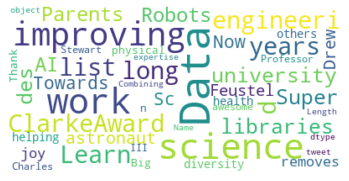

In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
df2 = df[(df['date']>='2019-05-11') & (df['date']<='2019-05-14')]
positive = df2[df2['sentiment_category']=='positive']
wordcloud = WordCloud(max_font_size=50, max_words=500, background_color="white").generate(str(positive['tweet']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [16]:
print(df[df['sentiment_category']=='positive'])

                                                    tweet        date  \
0       What can be done?  - Never blindly trust an ab...  2021-06-20   
3       .@Stephenson_Data shares four steps that will ...  2021-06-20   
4       "Curricula is inherently brittle in a world wh...  2021-06-20   
6       @LinkLabsInc @IoTchannel Wow! Wonderful!! Cong...  2021-06-20   
9       Demystifying #AI with 10 top applications:  ht...  2021-06-20   
...                                                   ...         ...   
241370  Four short links: 15 January 2010 - Best Scien...  2010-01-15   
241375  Anti-science disinformers to media:  Please ma...  2010-01-13   
241377  @Sheril_ I'd love to see some empirical data o...  2010-01-12   
241380  Top nations in computer science:  http://bit.l...  2010-01-10   
241382  RT @filiber: Have a Computer Science backgroun...  2010-01-06   

                         id  sentiment sentiment_category  
0       1406400408545804288     0.4588           positive  
3  

In [17]:
print(df[df['sentiment_category']=='negative'])

                                                    tweet        date  \
1       "We need a paradigm shift from model-centric t...  2021-06-20   
5       Many common colour maps distort data through u...  2021-06-20   
19      ApolloScape (world’s largest open-source datas...  2021-06-20   
36      Disruption defines our world, and the latest h...  2021-06-19   
37      The Science Table estimates for Delta spread c...  2021-06-19   
...                                                   ...         ...   
241355  @DanaKCTV5 We think Phil now studies weather d...  2010-02-02   
241366  @GrahamHill And to be really consequent: not o...  2010-01-21   
241371  @andrewbarnett you could, note that iphones mo...  2010-01-15   
241373  CARPE DIEM BLOG: "Structural Barriers" Discour...  2010-01-14   
241384  All in the....data RT @noahWG Dr. Petra provid...  2010-01-05   

                         id  sentiment sentiment_category  
1       1406390341176016897    -0.3535           negative  
5  